**Import relevant libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

**To verify directory of the data**

In [2]:
import os
directory = '/kaggle/input'
files = os.listdir(directory)
print(files)

['craigslist-vehicles']


**Specify file name and directory**


To easily access and load the data

In [3]:
directory = '/kaggle/input/craigslist-vehicles'
file_name = 'craigslist_vehicles.csv'

**Combine the file name and directory to create a full path**

In [4]:
file_path = os.path.join(directory, file_name)

**Load the data**

In [5]:
df = pd.read_csv(file_path, encoding='utf-8')
df

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,...,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,362771,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,362710,7311834578,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,303849,7307070484,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,5100,2009.0,NaN,saab 9-7x,fair,...,SUV,grey,https://images.craigslist.org/00b0b_dsIhheG86S...,For sale: 2009 Saab 9-7x Fair condition AWD ...,NaN,oh,39.937000,-82.031500,2021-04-15 00:00:00+00:00,2021-04-21 00:00:00+00:00
426876,303706,7314635557,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,7500,2011.0,ford,f-450,good,...,bus,red,https://images.craigslist.org/00b0b_8lBfNkZ6pr...,"2011 E-Ford 450 with 177k miles, 6.8 liter v-1...",NaN,oh,39.927400,-82.004100,2021-04-30 00:00:00+00:00,2021-05-15 00:00:00+00:00
426877,303704,7314710341,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,25000,2016.0,chevrolet,silverado,excellent,...,truck,blue,https://images.craigslist.org/00k0k_jw0Pda6LTk...,2013 Silverado excellent condition. Blue in co...,NaN,oh,39.896865,-82.042283,2021-04-30 00:00:00+00:00,2021-05-12 00:00:00+00:00
426878,303670,7316225330,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,6,1986.0,NaN,camaro iroc z28,good,...,NaN,red,https://images.craigslist.org/00Y0Y_avlrYDn7OY...,"1986 Iroc Z28 , T-tops , 86,500 miles , has ne...",NaN,oh,39.938630,-82.006760,2021-05-03 00:00:00+00:00,2021-05-08 00:00:00+00:00


**Handle Missing values**

Fill the blanks using median for numerical columns and mode for categorical columns

In [6]:
numerical_cols = ['price', 'year']
categorical_cols = ['manufacturer', 'model', 'condition'] 
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

**Conversion of data type**

Convert the 'posting_date' column to a datetime data type

In [7]:
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce') 

**Filter out rows with NaT in the posting_date column**

In [8]:
df = df[~df['posting_date'].isna()]

**Create a Date time index**

Set the 'posting_date' column as the index to facilitate time-series analysis.


In [9]:
df.set_index('posting_date', inplace=True)

**Ensure 'posting_date' is sorted**

In [10]:
df = df.sort_values(by='posting_date')

**Plot the time series**

To show how prices change over time based on posting dates

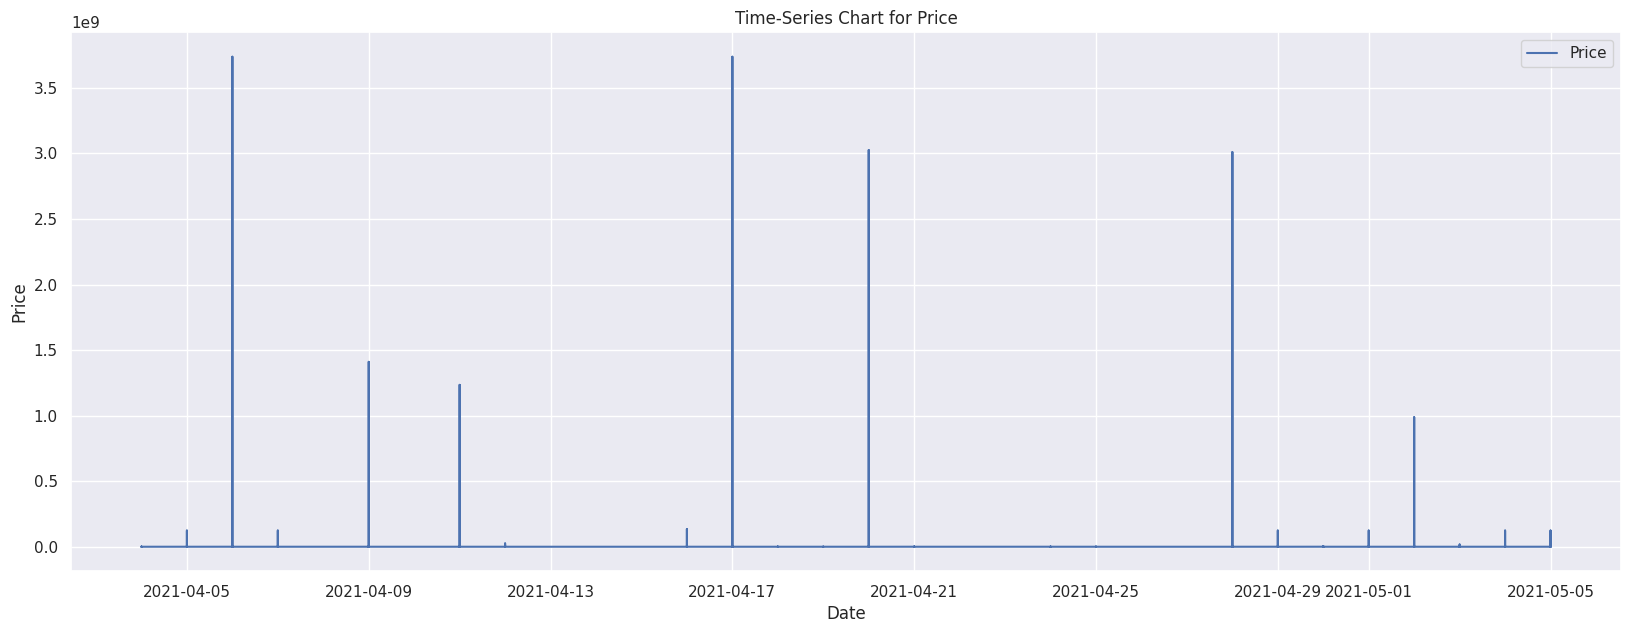

In [11]:
plt.figure(figsize=(20,7))
plt.plot(df.index, df['price'], label='Price', color='b')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time-Series Chart for Price')
plt.legend()
plt.grid(True)
plt.show()